### **Understanding the dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import calendar
import plotly.graph_objects as go
df = pd.read_csv('Groceries_dataset.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Groceries_dataset.csv'

In [ ]:
df.shape # Dimensions of the dataset

(38765, 3)

In [ ]:
df.info()  # Characteristics of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


### **Date pre-processing**

In [ ]:
df.isna().sum() # Checking the number of Nan values in each column

,0
Member_number,0
Date,0
itemDescription,0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])# Transforming the object to datetime
# Since no value errors are raised when converting to datetime, all dates in the dataset are valid
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


<ipython-input-5-c29d2418d6b1>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])# Transforming the object to datetime


In [ ]:
print("Earliest date : ",df['Date'].min())
print("Latest date : ",df['Date'].max())

Earliest date :  2014-01-01 00:00:00
Latest date :  2015-12-30 00:00:00


In [ ]:
# Adding 3 more columns for Day, Month and Year
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
 3   year             38765 non-null  int32         
 4   month            38765 non-null  int32         
 5   day              38765 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
df.head(3)

,Member_number,Date,itemDescription,year,month,day
0,1808,2015-07-21,tropical fruit,2015,7,21
1,2552,2015-01-05,whole milk,2015,1,5
2,2300,2015-09-19,pip fruit,2015,9,19


## **Descriptive Analytics**

In [ ]:
# Number of unique customers in the dataset
df['Member_number'].nunique()

3898

In [ ]:
# Number of unique items in the dataset
df['itemDescription'].nunique()

167

Text(0.5, 1.0, 'Top 10 selling items')

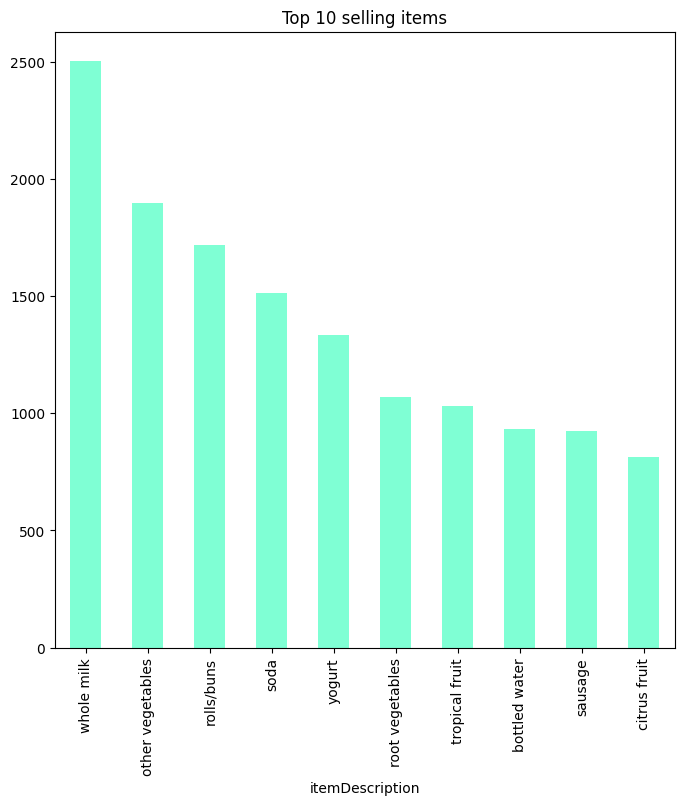

In [ ]:
# Bar Graph for the top 10 selling items
plt.figure(figsize = (8,8))
df.itemDescription.value_counts().head(10).plot.bar(color='aquamarine')
plt.title('Top 10 selling items')

**-> Whole milk is the top selling item in the dataset**

Text(0.5, 1.0, 'Top 10 least selling items')

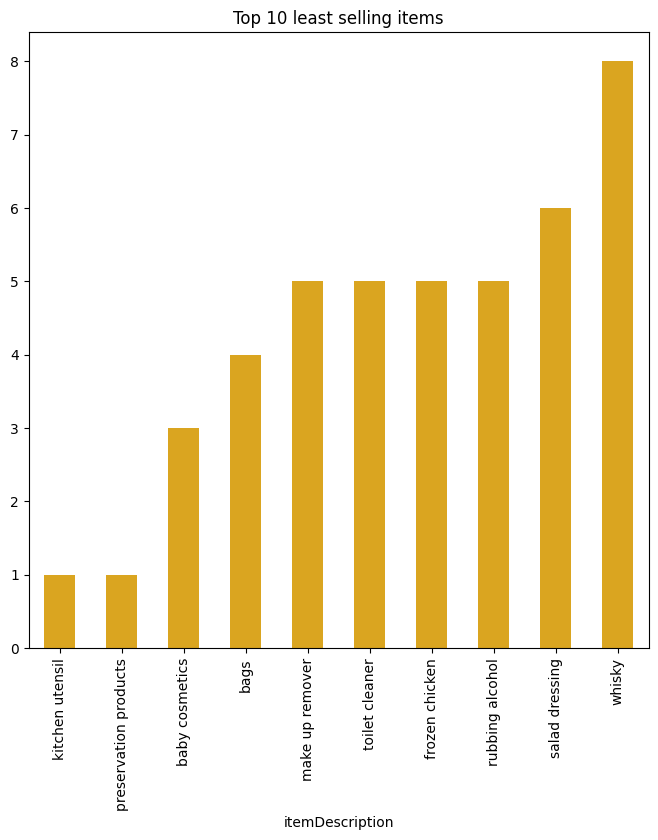

In [ ]:
plt.figure(figsize = (8,8))
df.itemDescription.value_counts().tail(10).sort_values().plot.bar(color='goldenrod')
plt.title('Top 10 least selling items')

**->Kitchen utensil is the least sold item in the dataset**

In [ ]:
frequency_of_items = df.groupby(pd.Grouper(key = 'itemDescription')).size().reset_index(name = 'count')
fig = px.treemap(frequency_of_items, path = ['itemDescription'], values = 'count')
fig.update_layout(
    title_text = 'Frequency of the Items Sold',
    title_x = 0.5, title_font = dict(size = 16),
    height = 999
)
fig.update_traces(textinfo = "label+value")
fig.show()

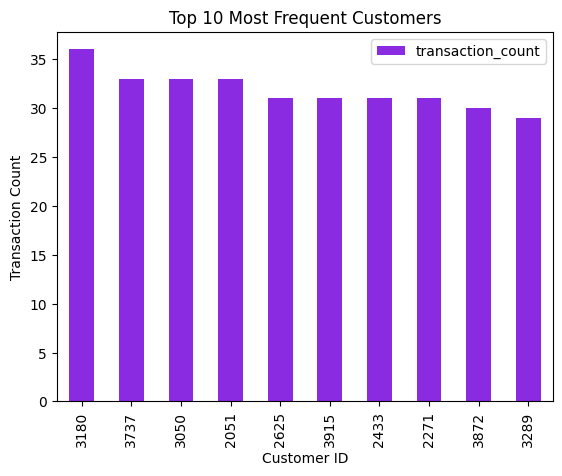

In [ ]:
customer_frequency = df['Member_number'].value_counts()

# Converting to a DataFrame for easy handling and renaming the column
customer_frequency = customer_frequency.rename_axis('Member_number').reset_index(name='transaction_count')

# Displaying Top 10 most frequent customers
top_customers = customer_frequency.head(10)

top_customers.plot(kind='bar', x='Member_number', y='transaction_count', color='blueviolet')
plt.title("Top 10 Most Frequent Customers")
plt.xlabel("Customer ID")
plt.ylabel("Transaction Count")
plt.show()

**-> It is recommended to offer loyalty points to regular customers, which can be redeemed for discounts and promotions, to enhance their shopping engagement and encourage repeat purchases.**

<ipython-input-15-d21ec7a5d81c>:4: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of Items Sold')]

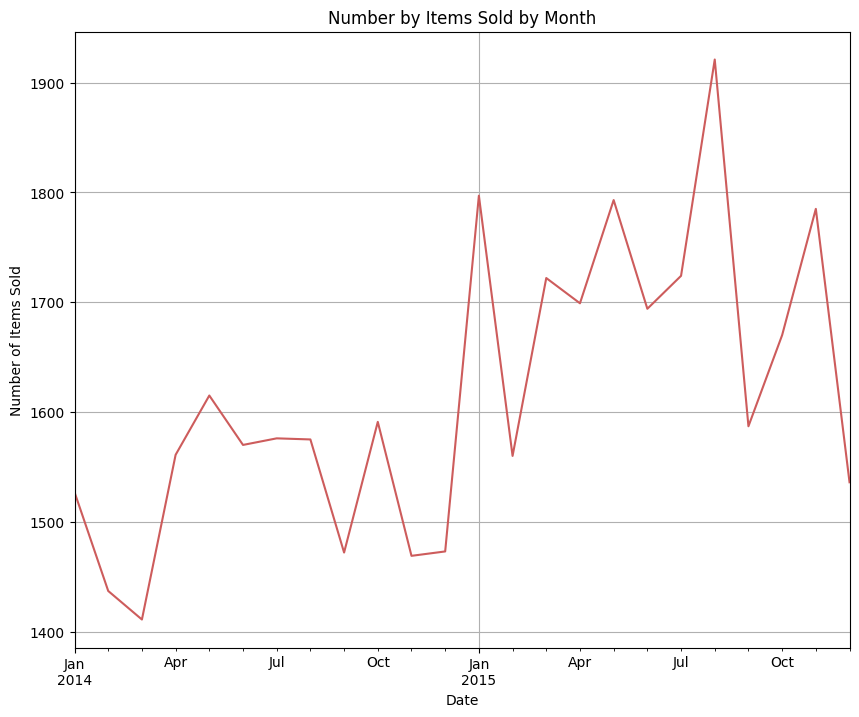

In [ ]:
# Plotting the number of items sold in a month
df_date=df.set_index(['Date']) ## Setting date as index for plotting purpose
df_date
df_date.resample("M")['itemDescription'].count().plot(figsize = (10,8),
        grid = True, color= 'indianred', title = "Number by Items Sold by Month").set(xlabel = "Date",
        ylabel = "Number of Items Sold")

**-> August 2015 is the month where the number of items sold is the highest**

**-> March 2014 is the month where the number of items sold is the lowest**

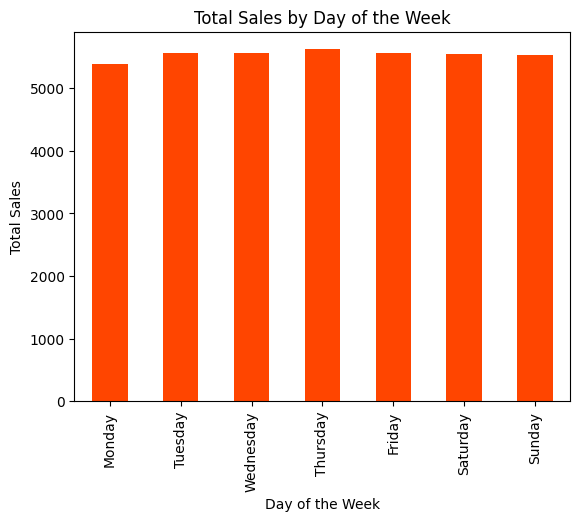

In [ ]:
df['day_of_week'] = df['Date'].dt.day_name()  # Gets full day name, e.g., 'Monday'

# Group by the day of the week and sum quantities to get total sales
sales_by_day = df.groupby('day_of_week')['Member_number'].count().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
sales_by_day.plot(kind='bar', color='orangered')
plt.title("Total Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.show()

**-> Sales remain consistent across all days of the week, with a slight increase observed on Thursdays compared to other days.**

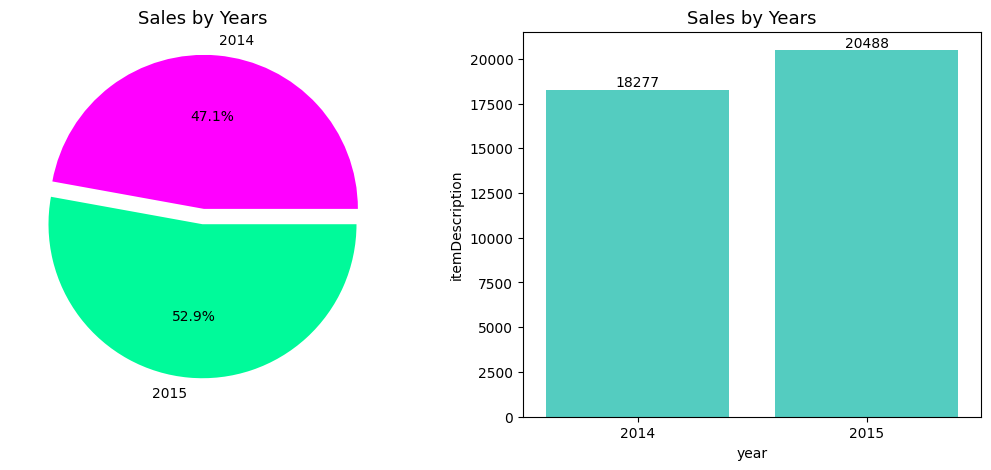

In [ ]:
# Number of items sold in a year
datayears = df.groupby('year')['itemDescription'].count().reset_index()
datayearsy = datayears['year'].tolist()
dataitem = datayears['itemDescription'].tolist()

# Pie chart
plt.figure(figsize = (13, 5))
plt.subplot(1, 2, 1)
explode = (0.1, 0)
colors = sns.color_palette('Paired')
plt.pie(dataitem, labels = datayearsy, autopct = '%1.1f%%',colors=['fuchsia','mediumspringgreen'], explode = explode)
plt.title('Sales by Years', size = 13)

# Bar chart
plt.subplot(1, 2, 2)
ax=sns.barplot(x = 'year', y = 'itemDescription', data = datayears,color='turquoise')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Sales by Years', size = 13)
plt.show()


**-> Sales in 2015 were slightly higher compared to 2014.**

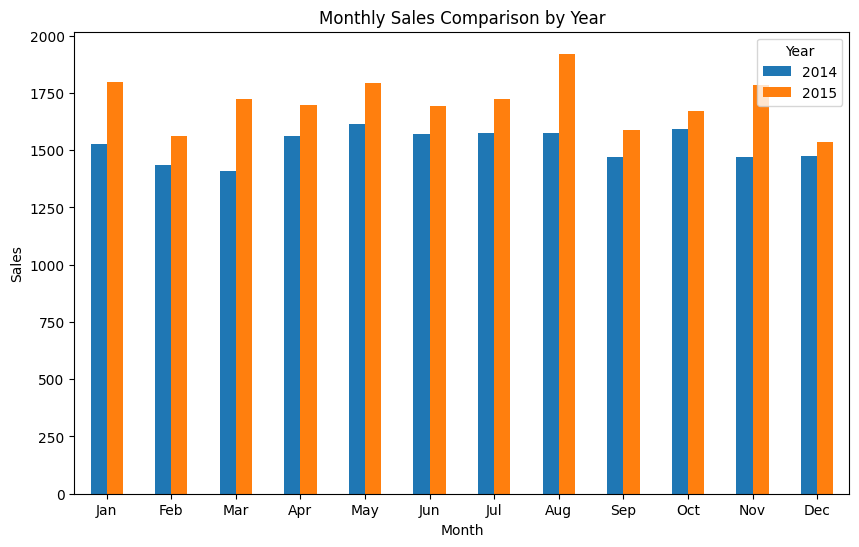

In [ ]:
monthly_sales = df.groupby(['year', 'month'])['itemDescription'].sum().reset_index()
pivot_df = monthly_sales.pivot(index='month', columns='year', values='itemDescription')
count_pivot_df = df.pivot_table(index='month', columns='year', values='itemDescription', aggfunc='count')
count_pivot_df.plot(kind='bar', figsize=(10, 6))
plt.title("Monthly Sales Comparison by Year")
plt.xlabel("Month")
plt.ylabel("Sales")

# Set the x-axis ticks to month abbrs
month_abbrs = [calendar.month_abbr[month] for month in pivot_df.index]
plt.xticks(ticks=range(len(month_abbrs)), labels=month_abbrs, rotation=0)

plt.legend(title="Year")
plt.show()

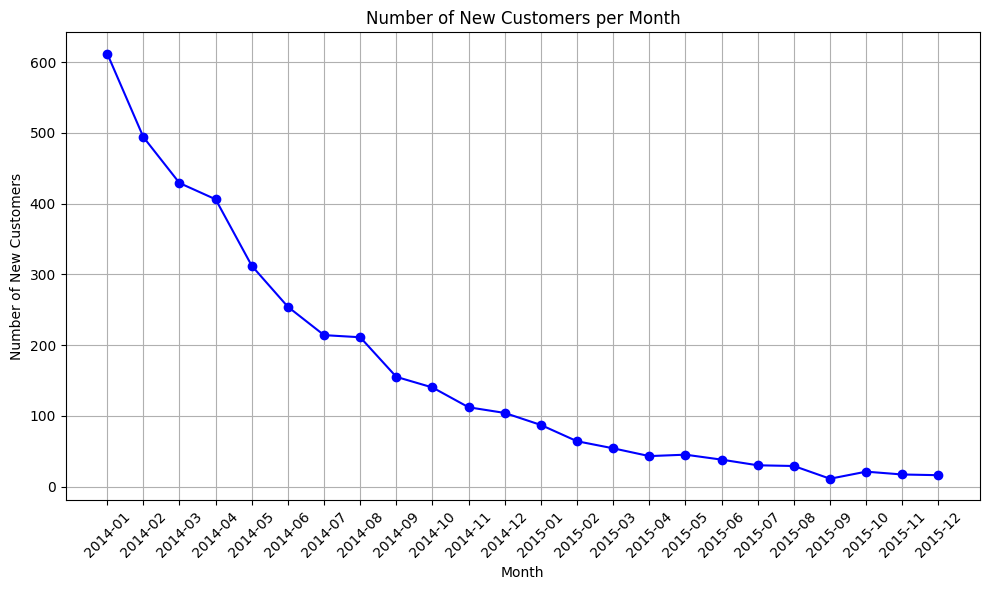

In [ ]:
df['year_month'] = df['Date'].dt.to_period('M')

# Determining the first month each customer appeared
first_purchase = df.groupby('Member_number')['year_month'].min().reset_index()
first_purchase.columns = ['Member_number', 'first_purchase_month']

# Merge back to identify new customers per month
df = df.merge(first_purchase, on='Member_number')

# Filter for new customers and count them by month
new_customers_per_month = df[df['year_month'] == df['first_purchase_month']].groupby('year_month')['Member_number'].nunique()

# Convert to DataFrame for readability
new_customers_per_month = new_customers_per_month.reset_index()
new_customers_per_month.columns = ['Month', 'New_Customers']

# Plotting line chart
plt.figure(figsize=(10, 6))
plt.plot(new_customers_per_month['Month'].astype(str), new_customers_per_month['New_Customers'], marker='o', color='b')
plt.title("Number of New Customers per Month")
plt.xlabel("Month")
plt.ylabel("Number of New Customers")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)
plt.tight_layout()
plt.show()

**-> The customer growth trend is showing a decline. It is recommended to implement promotions or advertisements to stimulate growth and increase customer engagement.**

In [ ]:
fig = px.sunburst(df, path=["year",'month', 'day'])
fig.show()

**-> Sales in February consistently show a decline across both years.**

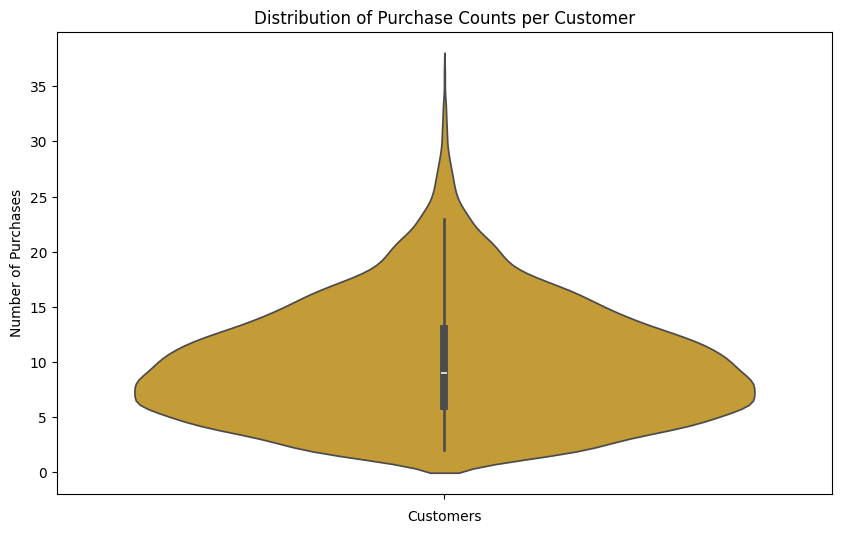

In [ ]:
purchase_counts = df.groupby('Member_number').size().reset_index(name='purchase_count')
plt.figure(figsize=(10, 6))
sns.violinplot(data=purchase_counts, y='purchase_count',color='goldenrod')
plt.title('Distribution of Purchase Counts per Customer')
plt.xlabel('Customers')
plt.ylabel('Number of Purchases')
plt.show()

**-> On average, a customer makes approximately 9 to 10 purchases over the span of two years.**

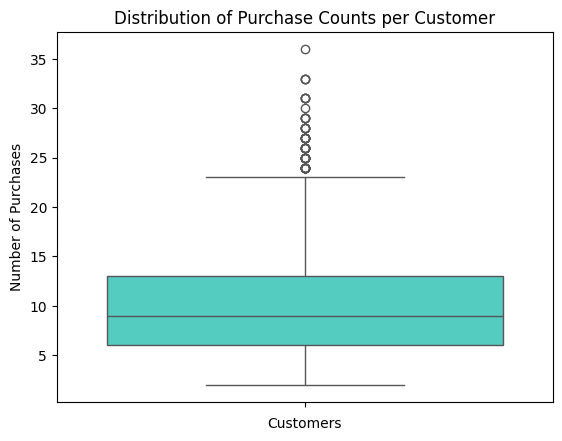

,purchase_count
count,3898.000000
mean,9.944844
std,5.310796
min,2.000000
25%,6.000000
50%,9.000000
75%,13.000000
max,36.000000


In [ ]:
sns.boxplot(data=purchase_counts, y='purchase_count',color='turquoise')
plt.title('Distribution of Purchase Counts per Customer')
plt.xlabel('Customers')
plt.ylabel('Number of Purchases')
plt.show()
purchase_counts['purchase_count'].describe()

**-> The highest number of purchases made by a customer is 36, which is considered an outlier in the dataset.**

In [ ]:
df['purchase_count'] = df.groupby('Member_number')['itemDescription'].transform('count')
df['customer_stage'] = pd.cut(df['purchase_count'], bins=[0, 5, 20, float('inf')], labels=['Browsing', 'Regular', 'Loyal'])

stage_counts = df.groupby('customer_stage')['Member_number'].nunique().sort_values(ascending=False)


# Plotting funnel chart
fig = go.Figure(go.Funnel(
    y = stage_counts.index,
    x = stage_counts.values
))
fig.update_layout(title='Customer Purchase Funnel')
fig.show()

<ipython-input-24-61705c2a6c3f>:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



**-> The number of loyal customers is relatively small, with their purchase frequency ranging from 20 or more.**

# Prediction Analysis
1. ## Association Rules
2. ## Classification Models
3. ## Clustering models


## **Frequent Itemsets**

In [ ]:
import numpy as np
import pandas as pd
import time
from mlxtend.frequent_patterns import fpgrowth,apriori
from mlxtend.frequent_patterns import association_rules
df=pd.read_csv('Groceries_dataset.csv')
pivot_df = df.pivot_table(index='Member_number', columns='itemDescription', aggfunc='size', fill_value=0)

# Convert to one-hot encoding (binary)
one_hot_df = pivot_df.applymap(lambda x: 1 if x > 0 else 0).reset_index()
one_hot_df.to_csv('grocery_fp.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-2-b440341feed1>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  one_hot_df = pivot_df.applymap(lambda x: 1 if x > 0 else 0).reset_index()


In [ ]:
df = pd.read_csv('grocery_fp.csv') #new updates dataset one hot encoded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Check the columns of the DataFrame
print(df.columns)

# If 'Member_number' is in the columns, proceed to drop it
if 'Member_number' in df.columns:
    df = df.drop('Member_number', axis=1)
else:
    print("Column 'Member_number' not found in the DataFrame.")

Index(['Instant food products', 'UHT-milk', 'abrasive cleaner',
       'artif. sweetener', 'baby cosmetics', 'bags', 'baking powder',
       'bathroom cleaner', 'beef', 'berries',
       ...
       'turkey', 'vinegar', 'waffles', 'whipped/sour cream', 'whisky',
       'white bread', 'white wine', 'whole milk', 'yogurt', 'zwieback'],
      dtype='object', length=167)
Column 'Member_number' not found in the DataFrame.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FREQUENT ITEMSETS GENERATED BY FPGROWTH

In [ ]:
start_time = time.time()
frequent_itemsets = fpgrowth(df, min_support=0.1, use_colnames=True)
end_time = time.time()
print(frequent_itemsets)
print("Execution time: ", end_time - start_time, "seconds")

     support                        itemsets
0   0.458184                    (whole milk)
1   0.313494                          (soda)
2   0.282966                        (yogurt)
3   0.206003                       (sausage)
4   0.177527                        (pastry)
5   0.165213                   (canned beer)
6   0.349666                    (rolls/buns)
7   0.154695            (whipped/sour cream)
8   0.137506                   (frankfurter)
9   0.120831                          (curd)
10  0.119548                          (beef)
11  0.376603              (other vegetables)
12  0.233710                (tropical fruit)
13  0.126475                        (butter)
14  0.102617             (frozen vegetables)
15  0.230631               (root vegetables)
16  0.170600                     (pip fruit)
17  0.168291                 (shopping bags)
18  0.116983                     (margarine)
19  0.213699                 (bottled water)
20  0.158799                  (bottled beer)
21  0.1005

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



FREQUENT ITEMSETS GENERATED BY APRIORI

In [ ]:
start_time = time.time()
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
end_time = time.time()
print(frequent_itemsets)
print("Execution time: ", end_time - start_time, "seconds")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'df' is not defined

RULES GENERATED

In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
print("Top 20 association rules")
rules_sorted = rules.sort_values(by=['confidence'], ascending=False)
rules_sorted = rules_sorted.reset_index(drop=True)
rules_sorted.index = rules_sorted.index + 1
rules_sorted[['antecedents','consequents','support','confidence']].head(20)

Top 20 association rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,support,confidence
1,(yogurt),(whole milk),0.150590,0.532185
2,(bottled water),(whole milk),0.112365,0.525810
3,(sausage),(whole milk),0.106978,0.519303
4,(rolls/buns),(whole milk),0.178553,0.510638
5,(other vegetables),(whole milk),0.191380,0.508174
6,(tropical fruit),(whole milk),0.116470,0.498353
7,(root vegetables),(whole milk),0.113135,0.490545
8,(soda),(whole milk),0.151103,0.481997
9,(yogurt),(other vegetables),0.120318,0.425204
10,(rolls/buns),(other vegetables),0.146742,0.419663


### **ACLOSE ALGORITHM**

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

def t_x(transactions, itemset):
    """
    This function returns the list of transactions where all items in the itemset occur.
    """
    transactions_with_itemset = [transaction for transaction in transactions if set(itemset).issubset(set(transaction))]
    return transactions_with_itemset

def i_t(transactions):
    """
    This function returns the maximum common subset of items across all transactions.
    """
    transactions_as_sets = [set(transaction) for transaction in transactions]
    common_items = set.intersection(*transactions_as_sets)
    return common_items

def closed_itemset(transactions, itemset):
    t_x_result = t_x(transactions, itemset)
    common_items = i_t(t_x_result)
    # Return if the intersection is equal to the itemset
    return common_items

def aclose(transactions, min_support):
    """
    This function performs the A-Close algorithm to find closed frequent itemsets.
    """
    # Convert transactions to a format suitable for apriori
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df = pd.DataFrame(te_ary, columns=te.columns_)

    # Generate frequent itemsets of length 2
    frequent_itemsets_size2 = apriori(df, min_support=min_support, use_colnames=True, max_len=2)

    # Total number of transactions
    total_transactions = len(transactions)

    # Add support count to the frequent itemsets
    frequent_itemsets_size2['support_count'] = frequent_itemsets_size2['support'] * total_transactions

    # Create minimal generators (itemsets whose support is not the same as any of their subsets)
    minimal_generators = []
    for i, row in frequent_itemsets_size2.iterrows():
        itemset = row['itemsets']
        support = row['support']

        # Check if the itemset is a minimal generator
        is_minimal_generator = True
        for j, subset_row in frequent_itemsets_size2.iterrows():
            subset_itemset = subset_row['itemsets']
            subset_support = subset_row['support']

            # Check if the subset has the same support and is a proper subset
            if subset_itemset < itemset and subset_support == support:
                is_minimal_generator = False
                break

        # Add the itemset to minimal generators if it is minimal
        if is_minimal_generator:
            minimal_generators.append((itemset, support, row['support_count']))

    # Convert minimal_generators to DataFrame
    minimal_generators_df = pd.DataFrame(minimal_generators, columns=['itemsets', 'support', 'support_count'])
    print("Mininmal generators")
    print(minimal_generators_df)
    # Initialize list for closed itemsets
    closed_item_list = []

    # Check each minimal generator for the closed itemset property
    for i, row in minimal_generators_df.iterrows():
        itemset = row['itemsets']
        closed_item_list.append(closed_itemset(transactions, itemset))
        #removing duplicates from the list
        closed_item_list = [list(item) for item in set(tuple(item) for item in closed_item_list)]

    return closed_item_list

groceries_data = pd.read_csv("Groceries_dataset.csv")

transactions = (
    groceries_data.groupby('Member_number')['itemDescription']
    .apply(lambda x: list(set(x)))  # Get unique items for each member
    .tolist()  # Convert the result to a list of lists
)
print(transactions)
min_support = 0.1  # Example minimum support threshold

closed_itemsets = aclose(transactions, min_support)
#converting closed_itemsets to set notation
closed_itemsets = [set(item) for item in closed_itemsets]
for i in range(len(closed_itemsets)):
    print(closed_itemsets[i])


[['pastry', 'semi-finished bread', 'yogurt', 'pickled vegetables', 'soda', 'canned beer', 'misc. beverages', 'sausage', 'salty snack', 'whole milk', 'hygiene articles'], ['rolls/buns', 'frankfurter', 'curd', 'beef', 'soda', 'sausage', 'whipped/sour cream', 'whole milk', 'white bread'], ['butter', 'butter milk', 'frozen vegetables', 'specialty chocolate', 'other vegetables', 'sugar', 'tropical fruit', 'whole milk'], ['rolls/buns', 'root vegetables', 'sausage', 'dental care', 'frozen meals', 'detergent'], ['rolls/buns', 'dish cleaner', 'pastry', 'red/blush wine', 'cling film/bags', 'canned beer', 'frozen fish', 'shopping bags', 'other vegetables', 'packaged fruit/vegetables', 'pip fruit', 'root vegetables', 'chocolate', 'tropical fruit', 'whole milk', 'hygiene articles'], ['rolls/buns', 'whipped/sour cream', 'margarine'], ['flour', 'rolls/buns', 'skin care', 'frankfurter', 'rice', 'softener', 'shopping bags', 'bottled beer', 'chocolate', 'whole milk', 'chicken', 'bottled water'], ['white

### **PINCER SEARCH ALGORITHM**

In [ ]:
from itertools import combinations
from collections import defaultdict

class PincerSearchOptimized:
    def __init__(self, dataset, min_support):
        self.dataset = dataset
        self.min_support = min_support
        self.transactions_count = len(dataset)
        self.itemsets_support = defaultdict(int)  # Store support counts for faster lookup

    def calculate_support(self, itemset):
        """Calculate the support of an itemset"""
        # Cache the support values to avoid redundant calculations
        if frozenset(itemset) in self.itemsets_support:
            return self.itemsets_support[frozenset(itemset)] / self.transactions_count

        count = sum(1 for transaction in self.dataset if itemset.issubset(transaction))
        self.itemsets_support[frozenset(itemset)] = count
        return count / self.transactions_count

    def generate_candidates(self, size, prev_frequent_itemsets):
        """Generate candidate itemsets of a given size"""
        candidates = set()
        prev_frequent_itemsets = list(prev_frequent_itemsets)  # Convert to list for indexing
        for i, itemset1 in enumerate(prev_frequent_itemsets):
            for itemset2 in prev_frequent_itemsets[i+1:]:
                # Join itemsets only if they share (size-2) elements
                candidate = itemset1 | itemset2
                if len(candidate) == size:
                    candidates.add(candidate)
        return candidates

    def mfs_prune(self, Lk, MFS):
        """Prune Lk based on the current MFS"""
        return {itemset for itemset in Lk if not any(itemset.issubset(m) for m in MFS)}

    def mfcs_prune(self, Ck, MFCS):
        """Prune Ck+1 based on the current MFCS"""
        return {itemset for itemset in Ck if any(itemset.issubset(m) for m in MFCS)}

    def mfcs_gen(self, Sk, MFCS):
        """Generate new candidates for MFCS"""
        new_mfcs = set(MFCS)
        for s in Sk:
            for m in MFCS:
                if s.issubset(m):
                    new_mfcs.remove(m)  # Remove m if s is a subset
            for e in s:
                new_mfcs.add(m - {e} for m in MFCS if m - {e} not in MFCS)
        return new_mfcs

    def recovery(self, Lk, MFS):
        """Recover candidates for the next iteration (Ck+1)"""
        Ck_plus_1 = set()
        for l in Lk:
            for m in MFS:
                if all(item in m for item in list(l)[:len(l)-1]):
                    for item in m:
                        Ck_plus_1.add(frozenset(l | {item}))
        return Ck_plus_1

    def pincer_search(self):
        """Main Pincer-Search algorithm"""
        k = 1
        MFS = set()
        MFCS = {frozenset([item]) for transaction in self.dataset for item in transaction}

        # Initially populate MFS with frequent 1-itemsets
        frequent_1_itemsets = {itemset for itemset in MFCS if self.calculate_support(itemset) >= self.min_support}
        MFS.update(frequent_1_itemsets)

        max_frequent_size = 1  # Start by tracking 1-itemsets, then increase as necessary
        prev_frequent_itemsets = frequent_1_itemsets

        while True:
            Ck = self.generate_candidates(k + 1, prev_frequent_itemsets)  # Generate candidate itemsets of size k+1
            frequent_itemsets = {itemset for itemset in Ck if self.calculate_support(itemset) >= self.min_support}

            MFS.update(frequent_itemsets)

            if frequent_itemsets:
                max_frequent_size = max(max_frequent_size, k + 1)  # Track the largest size found

            if not Ck or not frequent_itemsets:
                break

            # Prune Lk and MFCS
            Lk = self.mfs_prune(Ck, MFS)  # Prune Lk based on MFS
            MFCS = self.mfcs_prune(Ck, MFCS)  # Prune Ck+1 based on MFCS

            # Generate new candidates using the recovery procedure
            Ck_plus_1 = self.recovery(Lk, MFS)

            # Update prev_frequent_itemsets for the next iteration
            prev_frequent_itemsets = frequent_itemsets

            # Update k for the next iteration
            k += 1

        # Filter MFS to return only itemsets of the maximum size (greater than 1)
        max_frequent_itemsets = {itemset for itemset in MFS if len(itemset) == max_frequent_size and len(itemset) > 1}
        return max_frequent_itemsets


def load_dataset(file_path):
    """Load the dataset from a file"""
    dataset = []
    with open(file_path, 'r') as file:
        for line in file:
            transaction = set(map(int, line.strip().split()))
            dataset.append(transaction)
    return dataset

groceries_data = pd.read_csv("Groceries_dataset.csv")

transactions = (
    groceries_data.groupby('Member_number')['itemDescription']
    .apply(lambda x: list(set(x)))  # Get unique items for each member
    .tolist()  # Convert the result to a list of lists
)
min_support = 0.1

# Initialize and run the Pincer-Search
pincer_search = PincerSearchOptimized(transactions, min_support)
max_frequent_itemset = pincer_search.pincer_search()
print("MAX FREQUENT ITEMSETS:")
for i in max_frequent_itemset:
    print(i)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MAX FREQUENT ITEMSETS:
frozenset({'rolls/buns', 'soda'})
frozenset({'other vegetables', 'soda'})
frozenset({'other vegetables', 'yogurt'})
frozenset({'tropical fruit', 'whole milk'})
frozenset({'rolls/buns', 'yogurt'})
frozenset({'rolls/buns', 'other vegetables'})
frozenset({'whole milk', 'soda'})
frozenset({'whole milk', 'bottled water'})
frozenset({'whole milk', 'root vegetables'})
frozenset({'whole milk', 'other vegetables'})
frozenset({'whole milk', 'rolls/buns'})
frozenset({'whole milk', 'yogurt'})
frozenset({'sausage', 'whole milk'})


CHARM


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

# Load the dataset from CSV
df = pd.read_csv('grocery_fp.csv')

# Step 1: Process the dataset to create a list of transactions
# We assume each row represents an item purchased by a customer.
# Each column represents a product, and each cell is either 0 (not purchased) or 1 (purchased).

# Drop the first column if it's not related to the items (for example, 'Member_number' column)
df = df.drop(columns=["Member_number"])  # Modify if you have other irrelevant columns

# Convert the data to a list of transactions where each transaction is a list of items purchased
transactions = []
for index, row in df.iterrows():
    transaction = [df.columns[i] for i in range(len(row)) if row[i] == 1]
    transactions.append(transaction)

# Step 2: Transaction Encoder
encoder = TransactionEncoder()
encoded_data = encoder.fit_transform(transactions)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.columns_)

# Step 3: Apply Apriori to find frequent itemsets
# Adjust the min_support as per your needs
frequent_itemsets = apriori(encoded_df, min_support=0.01, use_colnames=True)

# Step 4: Filter closed itemsets
# A closed itemset is one that is not included in any larger frequent itemset
def is_closed(itemset, frequent_itemsets):
    itemset_set = set(itemset)
    for other_itemset in frequent_itemsets['itemsets']:
        if itemset_set.issubset(other_itemset) and itemset_set != other_itemset:
            return False
    return True

# Filter the frequent itemsets to keep only closed ones
closed_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: is_closed(x, frequent_itemsets))]

# Display the closed frequent itemsets
print("Closed Frequent Itemsets:")
print(closed_itemsets)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-17-f7f01c6796f7>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  transaction = [df.columns[i] for i in range(len(row)) if row[i] == 1]


Closed Frequent Itemsets:
       support                                           itemsets
0     0.015393                            (Instant food products)
12    0.016932                                          (candles)
18    0.010775                                          (cereals)
22    0.015393                            (chocolate marshmallow)
24    0.018728                                  (cling film/bags)
...        ...                                                ...
3011  0.011031     (whipped/sour cream, yogurt, whole milk, soda)
3012  0.010518  (other vegetables, yogurt, rolls/buns, bottled...
3013  0.013597  (other vegetables, sausage, yogurt, rolls/buns...
3014  0.010005  (other vegetables, shopping bags, yogurt, roll...
3015  0.013597  (other vegetables, yogurt, rolls/buns, whole m...

[1921 rows x 2 columns]


# **Classification models**
1. ## Decision tree models
2. ## Naive bayes models
3. ## Multinominal models
4. ## Support Vector Machine model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Load dataset
data = pd.read_excel('Groceries_dataset_with_costs.xlsx')

# View initial data
print(data.head())

   Member_number        Date   itemDescription  Cost
0           1808  21-07-2015    tropical fruit   229
1           2552  05-01-2015        whole milk   380
2           2300  19-09-2015         pip fruit    28
3           1187  12-12-2015  other vegetables   319
4           3037  01-02-2015        whole milk   380


In [ ]:
# Derive Day of Week from 'Date'
data['Date'] = pd.to_datetime(data['Date'])
data['Day of Week'] = data['Date'].dt.day_name()

# Aggregate total spending per customer
customer_spending = data.groupby('Member_number')['Cost'].sum().reset_index()
customer_spending['Spender Category'] = np.where(customer_spending['Cost'] > 200, 'High Spender', 'Low Spender')

# Merge back to original data
data = data.merge(customer_spending[['Member_number', 'Spender Category']], on='Member_number', how='left')


# Encode categorical features
le_item = LabelEncoder()
data['itemDescription Encoded'] = le_item.fit_transform(data['itemDescription'])



le_day = LabelEncoder()
data['Day of Week Encoded'] = le_day.fit_transform(data['Day of Week'])



# Create feature sets
features_1 = data.groupby('Member_number')['itemDescription Encoded'].first().reset_index()   # For spending prediction
features_2 = data[['itemDescription Encoded', 'Day of Week Encoded']].drop_duplicates()  # For day prediction



# Targets
target_1 = data.drop_duplicates('Member_number')['Spender Category']  # High/Low spender
target_2 = data.drop_duplicates(['itemDescription', 'Day of Week'])['Day of Week Encoded']  # Day of week



# Split data
X_train1, X_test1, y_train1, y_test1 = train_test_split(features_1, target_1, test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(features_2, target_2, test_size=0.3, random_state=42)

<ipython-input-8-6506018143af>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


# Decision tree model for spending predictions as high or low spender

Accuracy: 99.57%

Classification Report:
              precision    recall  f1-score   support

High Spender       1.00      1.00      1.00      1166
 Low Spender       0.00      0.00      0.00         4

    accuracy                           1.00      1170
   macro avg       0.50      0.50      0.50      1170
weighted avg       0.99      1.00      0.99      1170



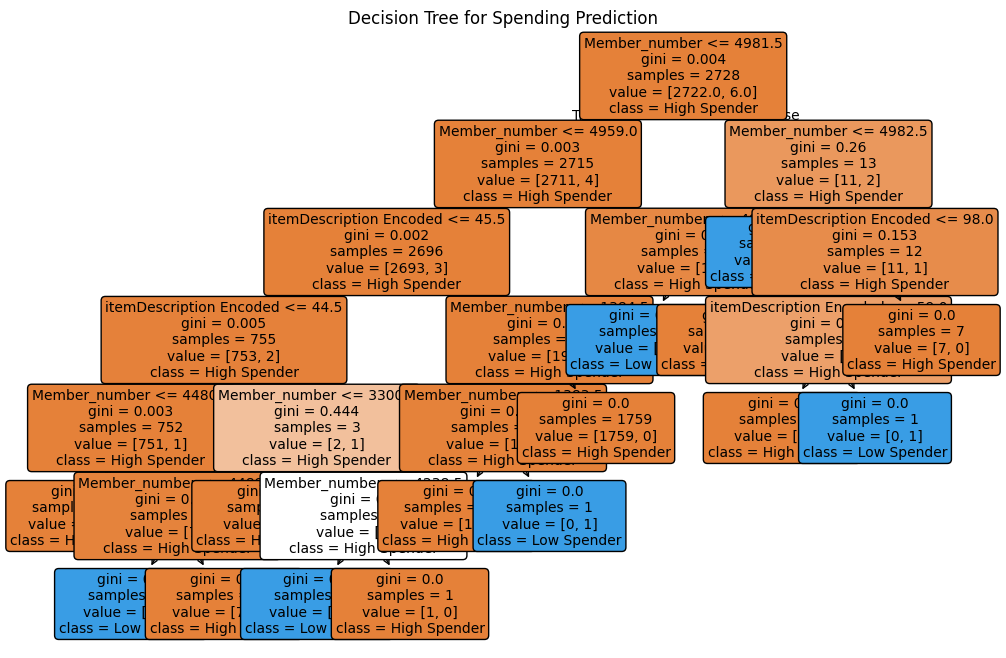

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree

# Initialize the Decision Tree Classifier
clf_1 = DecisionTreeClassifier(random_state=42)

# Train the model
clf_1.fit(X_train1, y_train1)

# Make predictions
y_pred = clf_1.predict(X_test1)

# Evaluate the model
accuracy = accuracy_score(y_test1, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test1, y_pred))

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf_1, filled=True, feature_names=features_1.columns, class_names=target_1.unique(), rounded=True, fontsize=10)
plt.title("Decision Tree for Spending Prediction")
plt.show()

# Naive Bayes Classifier model for spending predictions as high or low spender

Accuracy: 99.66%

Classification Report:
              precision    recall  f1-score   support

High Spender       1.00      1.00      1.00      1166
 Low Spender       0.00      0.00      0.00         4

    accuracy                           1.00      1170
   macro avg       0.50      0.50      0.50      1170
weighted avg       0.99      1.00      0.99      1170



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


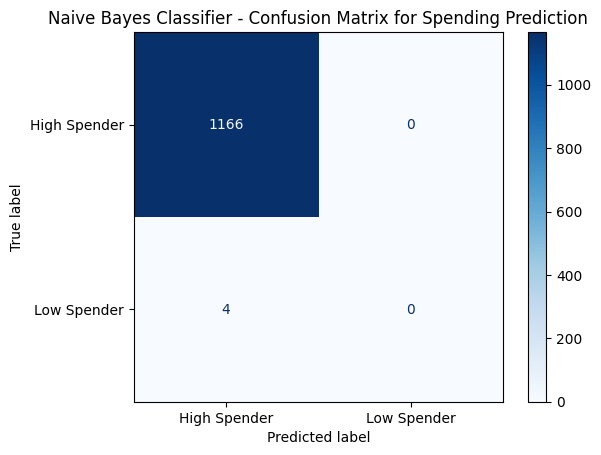

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize the Naive Bayes Classifier
nb_clf_1 = GaussianNB()

# Train the model for spending prediction (target_1)
nb_clf_1.fit(X_train1, y_train1)

# Make predictions
y_pred_nb = nb_clf_1.predict(X_test1)

# Evaluate the model
accuracy_nb = accuracy_score(y_test1, y_pred_nb)
print(f"Accuracy: {accuracy_nb*100:.2f}%")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test1, y_pred_nb))

# Display confusion matrix using confusion_matrix function
cm = confusion_matrix(y_test1, y_pred_nb)  # Calculate confusion matrix first
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_clf_1.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Naive Bayes Classifier - Confusion Matrix for Spending Prediction")
plt.show()

# Multinomial Naive Bayes Classifier model for predicting which day of a week model

Accuracy: 42.99%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.58      0.74      0.65        46
           2       0.31      0.23      0.27        47
           3       0.19      0.28      0.23        43
           4       0.21      0.06      0.09        50
           5       0.27      0.14      0.18        50
           6       0.31      0.57      0.41        49

    accuracy                           0.43       335
   macro avg       0.41      0.43      0.40       335
weighted avg       0.41      0.43      0.40       335



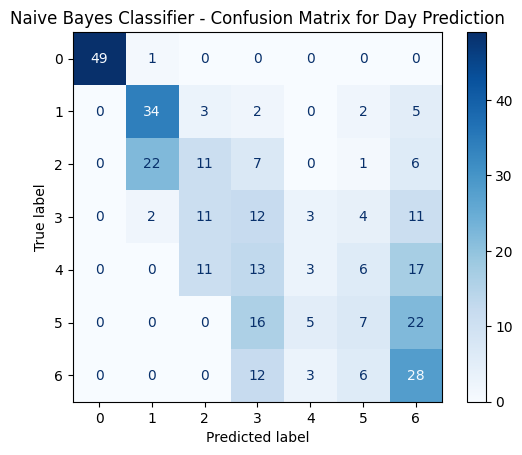

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Assuming you have the features_2 and target_2 already created from your dataset

# Initialize the Naive Bayes Classifier
nb_clf_2 = MultinomialNB()

# Train the model for day prediction (target_2)
nb_clf_2.fit(X_train2, y_train2)

# Make predictions
y_pred_nb_2 = nb_clf_2.predict(X_test2)

# Evaluate the model
accuracy_nb_2 = accuracy_score(y_test2, y_pred_nb_2)
print(f"Accuracy: {accuracy_nb_2*100:.2f}%")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test2, y_pred_nb_2))

# Display confusion matrix using confusion_matrix function
cm_2 = confusion_matrix(y_test2, y_pred_nb_2)  # Calculate confusion matrix first
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=nb_clf_2.classes_)
disp_2.plot(cmap=plt.cm.Blues)
plt.title("Naive Bayes Classifier - Confusion Matrix for Day Prediction")
plt.show()

# svc for model for spending predictions as high or low spender

Accuracy: 99.66%

Classification Report:
              precision    recall  f1-score   support

High Spender       1.00      1.00      1.00      1166
 Low Spender       0.00      0.00      0.00         4

    accuracy                           1.00      1170
   macro avg       0.50      0.50      0.50      1170
weighted avg       0.99      1.00      0.99      1170



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


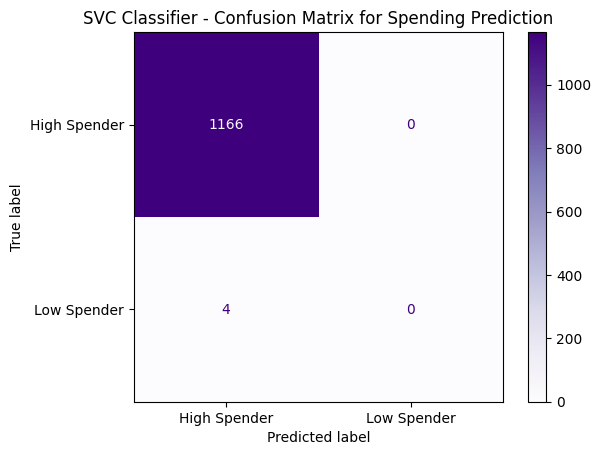

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize the Support Vector Classifier
svc_clf_1 = SVC(random_state=42)

# Train the model for spending prediction (target_1)
svc_clf_1.fit(X_train1, y_train1)

# Make predictions
y_pred_svc = svc_clf_1.predict(X_test1)

# Evaluate the model
accuracy_svc = accuracy_score(y_test1, y_pred_svc)
print(f"Accuracy: {accuracy_svc*100:.2f}%")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test1, y_pred_svc))

# Display confusion matrix using confusion_matrix function
cm_svc = confusion_matrix(y_test1, y_pred_svc)  # Calculate confusion matrix first
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=svc_clf_1.classes_)
disp_svc.plot(cmap=plt.cm.Purples, values_format='d', colorbar=True)
plt.title("SVC Classifier - Confusion Matrix for Spending Prediction")
plt.show()

# spending prediction as high or low spender the best model is **Naive bayesian & SVC** (it's obtained by keeping all **best hyper parameters** for the respective models)

# **Clustering**
1. ## K-means Clustering
2. ## DBSCAN Clustering
3. ## HDBSCAN Clustering
4. ## Agglomerative Clustering (AGNES)
5. ## Hierarchal Clustering

## Elbow method for K-means clustering

In [ ]:
# Load dataset
data = pd.read_excel('Groceries_dataset_with_costs.xlsx')

# View initial data
print(data.head())

   Member_number        Date   itemDescription  Cost
0           1808  21-07-2015    tropical fruit   229
1           2552  05-01-2015        whole milk   380
2           2300  19-09-2015         pip fruit    28
3           1187  12-12-2015  other vegetables   319
4           3037  01-02-2015        whole milk   380


<ipython-input-43-3e9adda1dd0f>:12: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


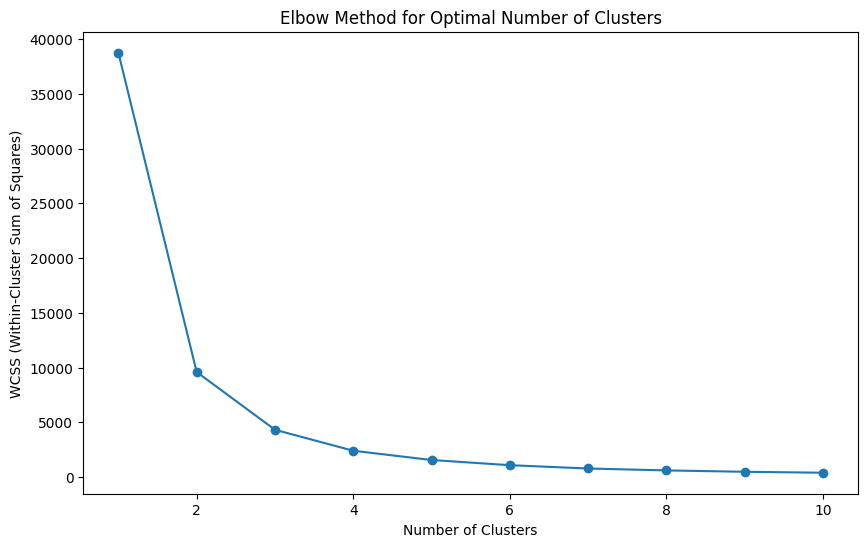

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_excel('Groceries_dataset_with_costs.xlsx')

# Convert Date to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

scaler = StandardScaler()
memberid_scaled = scaler.fit_transform(data[['Member_number']])

# Step 2: Use the Elbow Method to find the optimal number of clusters (k)
wcss = []
for k in range(1, 11):  # Testing cluster sizes from 1 to 10
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(memberid_scaled)
    wcss.append(kmeans.inertia_)  # The WCSS (within-cluster sum of squares)

# Step 3: Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# K-Means Clustering

<ipython-input-33-a8eacb0f3793>:12: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])



Performing K-Means Clustering...


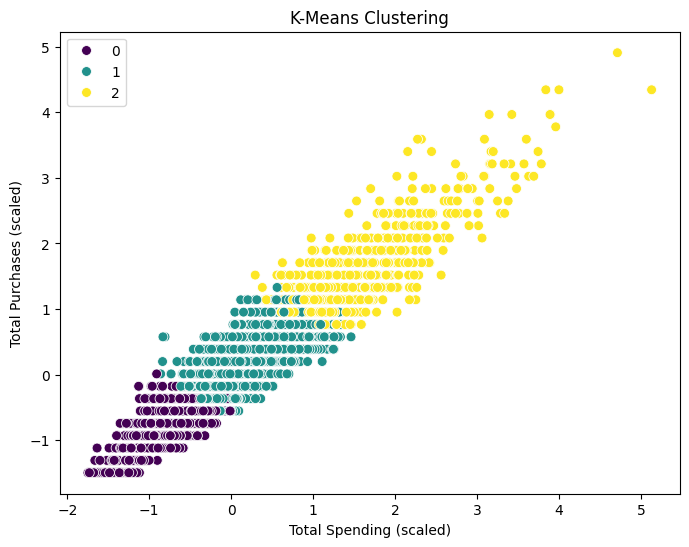


K-Means Clustering complete.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('Groceries_dataset_with_costs.xlsx')

# Convert Date to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Feature Engineering: Customer Behavior
customer_features = df.groupby('Member_number').agg(
    Total_Spending=('Cost', 'sum'),
    Total_Purchases=('itemDescription', 'count'),
    Unique_Items=('itemDescription', 'nunique'),
    Avg_Spending=('Cost', 'mean')
).reset_index()

# Prepare features for clustering
classification_features = customer_features[['Total_Spending', 'Total_Purchases', 'Unique_Items', 'Avg_Spending']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(classification_features)

# K-Means Clustering
print("\nPerforming K-Means Clustering...")
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Visualize K-Means Clustering Results
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=kmeans_labels,
    palette='viridis',
    s=50
)
plt.title('K-Means Clustering')
plt.xlabel('Total Spending (scaled)')
plt.ylabel('Total Purchases (scaled)')
plt.show()

print("\nK-Means Clustering complete.")


# DBSCAN Clustering

<ipython-input-27-616c9a1a19f3>:12: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


Performing DBSCAN Clustering...


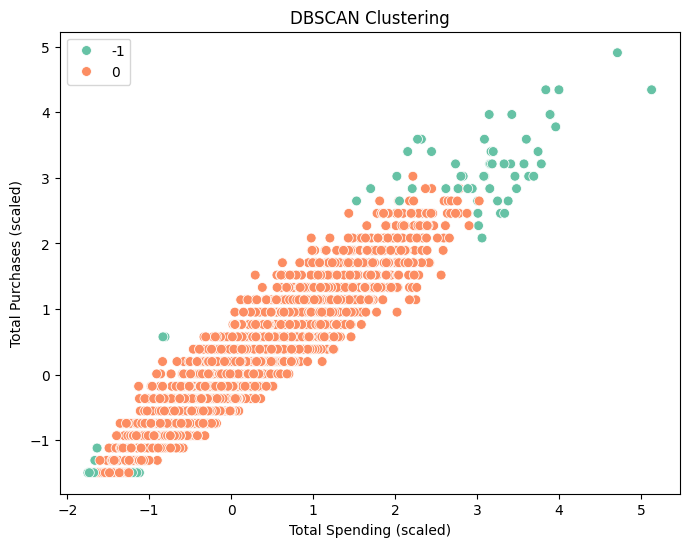


DBSCAN Clustering complete.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('Groceries_dataset_with_costs.xlsx')

# Convert Date to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Feature Engineering: Customer Behavior
customer_features = df.groupby('Member_number').agg(
    Total_Spending=('Cost', 'sum'),
    Total_Purchases=('itemDescription', 'count'),
    Unique_Items=('itemDescription', 'nunique'),
    Avg_Spending=('Cost', 'mean')
).reset_index()

# Prepare features for clustering
classification_features = customer_features[['Total_Spending', 'Total_Purchases', 'Unique_Items', 'Avg_Spending']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(classification_features)

# DBSCAN Clustering
print("Performing DBSCAN Clustering...")
dbscan = DBSCAN(eps=1, min_samples=150)
dbscan_labels = dbscan.fit_predict(scaled_features)

# Visualize DBSCAN Clustering Results
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=dbscan_labels,
    palette='Set2',
    s=50
)
plt.title('DBSCAN Clustering')
plt.xlabel('Total Spending (scaled)')
plt.ylabel('Total Purchases (scaled)')
plt.show()

print("\nDBSCAN Clustering complete.")


# HDBSCAN Clustering

In [ ]:
!pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 52.1 MB/s eta 0:00:00


<ipython-input-31-603ba68c6aa9>:12: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


Performing HDBSCAN Clustering...


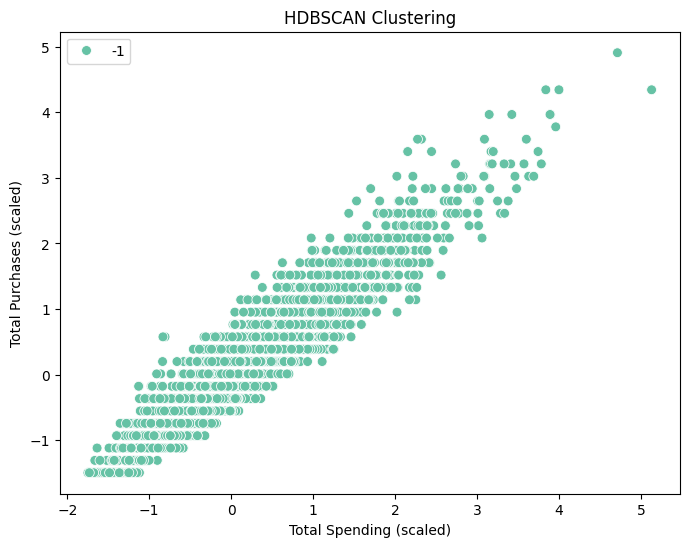


HDBSCAN Clustering complete.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('Groceries_dataset_with_costs.xlsx')

# Convert Date to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Feature Engineering: Customer Behavior
customer_features = df.groupby('Member_number').agg(
    Total_Spending=('Cost', 'sum'),
    Total_Purchases=('itemDescription', 'count'),
    Unique_Items=('itemDescription', 'nunique'),
    Avg_Spending=('Cost', 'mean')
).reset_index()

# Prepare features for clustering
classification_features = customer_features[['Total_Spending', 'Total_Purchases', 'Unique_Items', 'Avg_Spending']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(classification_features)

# HDBSCAN Clustering
print("Performing HDBSCAN Clustering...")
hdbscan_model = hdbscan.HDBSCAN(min_samples=150, cluster_selection_method='eom')
hdbscan_labels = hdbscan_model.fit_predict(scaled_features)

# Visualize HDBSCAN Clustering Results
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=hdbscan_labels,
    palette='Set2',
    s=50
)
plt.title('HDBSCAN Clustering')
plt.xlabel('Total Spending (scaled)')
plt.ylabel('Total Purchases (scaled)')
plt.show()

print("\nHDBSCAN Clustering complete.")

# Agglomerative Clustering (AGNES)

<ipython-input-28-159a2fd2aa09>:12: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


Performing AGNES Clustering...


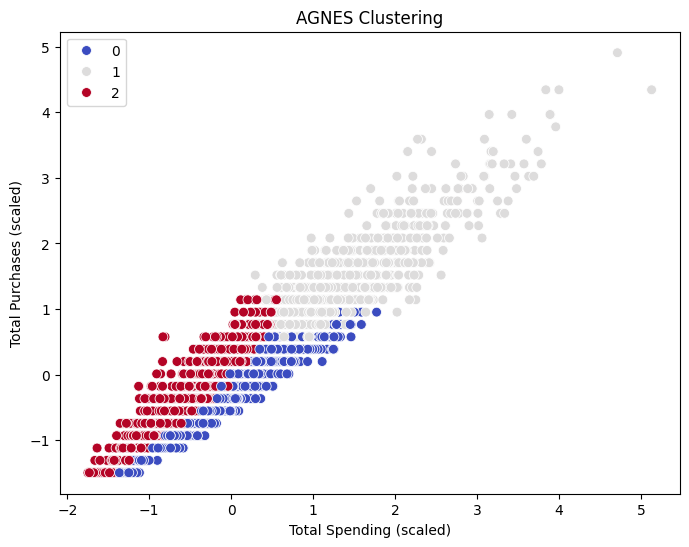


AGNES Clustering complete.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('Groceries_dataset_with_costs.xlsx')

# Convert Date to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Feature Engineering: Customer Behavior
customer_features = df.groupby('Member_number').agg(
    Total_Spending=('Cost', 'sum'),
    Total_Purchases=('itemDescription', 'count'),
    Unique_Items=('itemDescription', 'nunique'),
    Avg_Spending=('Cost', 'mean')
).reset_index()

# Prepare features for clustering
classification_features = customer_features[['Total_Spending', 'Total_Purchases', 'Unique_Items', 'Avg_Spending']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(classification_features)

# Agglomerative Clustering (AGNES)
print("Performing AGNES Clustering...")
agnes = AgglomerativeClustering(n_clusters=3, linkage='ward')
agnes_labels = agnes.fit_predict(scaled_features)

# Visualize Agglomerative Clustering Results
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=agnes_labels,
    palette='coolwarm',
    s=50
)
plt.title('AGNES Clustering')
plt.xlabel('Total Spending (scaled)')
plt.ylabel('Total Purchases (scaled)')
plt.show()

print("\nAGNES Clustering complete.")

<ipython-input-35-55bd6f1f0ed6>:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


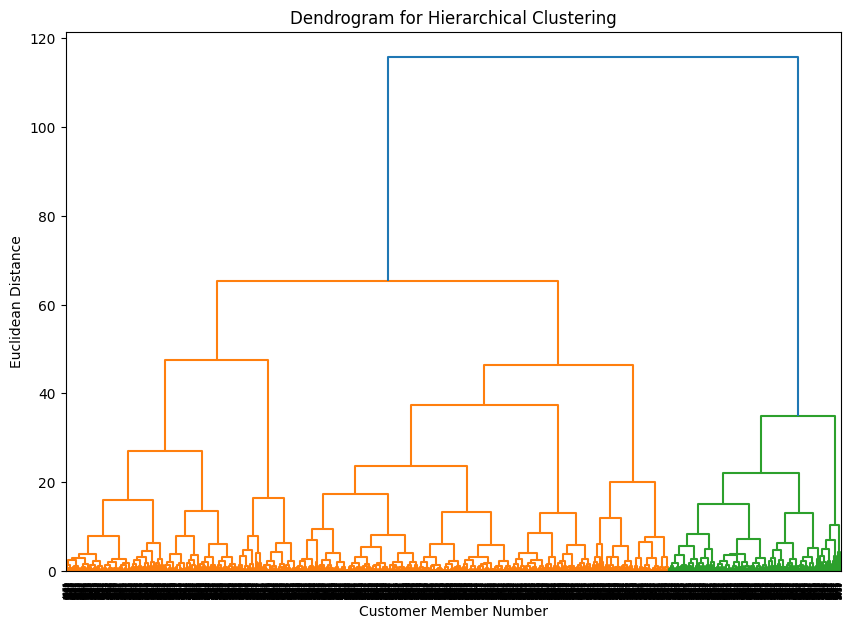

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('Groceries_dataset_with_costs.xlsx')

# Convert Date to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Feature Engineering: Customer Behavior
customer_features = df.groupby('Member_number').agg(
    Total_Spending=('Cost', 'sum'),
    Total_Purchases=('itemDescription', 'count'),
    Unique_Items=('itemDescription', 'nunique'),
    Avg_Spending=('Cost', 'mean')
).reset_index()

# Prepare features for clustering
classification_features = customer_features[['Total_Spending', 'Total_Purchases', 'Unique_Items', 'Avg_Spending']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(classification_features)

# Perform hierarchical clustering using 'ward' linkage method
linked = linkage(scaled_features, method='ward')

# Generate the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=customer_features['Member_number'].values,
           distance_sort='descending',
           show_leaf_counts=True)

plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customer Member Number')
plt.ylabel('Euclidean Distance')
plt.show()


## **PYSPARK**
# FP grwoth

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_date, col
from pyspark.sql.functions import collect_list
from pyspark.ml.fpm import FPGrowth
from pyspark.sql.functions import collect_set


# Initialize Spark session
spark = SparkSession.builder.appName("ExcelDataProcessing").getOrCreate()

# Load the CSV file into a PySpark DataFrame
csv_file_path = "Groceries_dataset.csv"  # Convert the xlsx to csv first
spark_df = spark.read.option("header", "true").csv(csv_file_path)


# Convert Date to DateType
spark_df = spark_df.withColumn("Date", to_date(col("Date"), "yyyy-MM-dd"))

# Convert Member_number to Integer
spark_df = spark_df.withColumn("Member_number", col("Member_number").cast("int"))


# Group items by Member_number and Date
transactions_df = spark_df.groupBy("Member_number", "Date") \
    .agg(collect_list("itemDescription").alias("items"))


# Group items by Member_number and Date, ensuring unique items per transaction
transactions_df = spark_df.groupBy("Member_number", "Date") \
    .agg(collect_set("itemDescription").alias("items")) # Use collect_set for unique items

fpGrowth = FPGrowth(itemsCol="items", minSupport=0.01, minConfidence=0.1)
model = fpGrowth.fit(transactions_df)

# Frequent Itemsets
model.freqItemsets.show(truncate=False)

# Association Rules
model.associationRules.show(truncate=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


+---------------------------------------------+----+
|items                                        |freq|
+---------------------------------------------+----+
|[specialty cheese]                           |71  |
|[chocolate marshmallow]                      |60  |
|[pet care]                                   |85  |
|[pet care, rolls/buns]                       |40  |
|[pet care, other vegetables]                 |40  |
|[house keeping products]                     |45  |
|[flower (seeds)]                             |67  |
|[curd]                                       |471 |
|[curd, sausage]                              |125 |
|[curd, sausage, rolls/buns]                  |59  |
|[curd, sausage, rolls/buns, whole milk]      |39  |
|[curd, sausage, yogurt]                      |58  |
|[curd, sausage, yogurt, whole milk]          |39  |
|[curd, sausage, other vegetables]            |58  |
|[curd, sausage, other vegetables, whole milk]|40  |
|[curd, sausage, soda]                        

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("ExcelDataProcessing").getOrCreate()

# Load the CSV file into a PySpark DataFrame
csv_file_path = "Groceries_dataset.csv"  # Convert the xlsx to csv first
spark_df = spark.read.option("header", "true").csv(csv_file_path)

# Show the data
spark_df.show()


+-------------+----------+--------------------+
|Member_number|      Date|     itemDescription|
+-------------+----------+--------------------+
|         1808|21-07-2015|      tropical fruit|
|         2552|05-01-2015|          whole milk|
|         2300|19-09-2015|           pip fruit|
|         1187|12-12-2015|    other vegetables|
|         3037|01-02-2015|          whole milk|
|         4941|14-02-2015|          rolls/buns|
|         4501|08-05-2015|    other vegetables|
|         3803|23-12-2015|          pot plants|
|         2762|20-03-2015|          whole milk|
|         4119|12-02-2015|      tropical fruit|
|         1340|24-02-2015|        citrus fruit|
|         2193|14-04-2015|                beef|
|         1997|21-07-2015|         frankfurter|
|         4546|03-09-2015|             chicken|
|         4736|21-07-2015|              butter|
|         1959|30-03-2015|fruit/vegetable j...|
|         1974|03-05-2015|packaged fruit/ve...|
|         2421|02-09-2015|           cho

In [ ]:
from pyspark.sql.functions import to_date, col

# Convert Date to DateType
spark_df = spark_df.withColumn("Date", to_date(col("Date"), "yyyy-MM-dd"))

# Convert Member_number to Integer
spark_df = spark_df.withColumn("Member_number", col("Member_number").cast("int"))

spark_df.printSchema()


root
 |-- Member_number: integer (nullable = true)
 |-- Date: date (nullable = true)
 |-- itemDescription: string (nullable = true)



In [ ]:
from pyspark.sql.functions import collect_list

# Group items by Member_number and Date
transactions_df = spark_df.groupBy("Member_number", "Date") \
    .agg(collect_list("itemDescription").alias("items"))


transactions_df.select("Member_number", "items").show(truncate=False)




+-------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Member_number|items                                                                                                                                                                                                                                                                                                          |
+-------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|1000         |[soda, canned beer, sausa

In [ ]:
from pyspark.ml.fpm import FPGrowth
from pyspark.sql.functions import collect_set

# Group items by Member_number and Date, ensuring unique items per transaction
transactions_df = spark_df.groupBy("Member_number", "Date") \
    .agg(collect_set("itemDescription").alias("items")) # Use collect_set for unique items

fpGrowth = FPGrowth(itemsCol="items", minSupport=0.01, minConfidence=0.1)
model = fpGrowth.fit(transactions_df)

# Frequent Itemsets
model.freqItemsets.show(truncate=False)

# Association Rules
model.associationRules.show(truncate=False)


+---------------------------------------------+----+
|items                                        |freq|
+---------------------------------------------+----+
|[specialty cheese]                           |71  |
|[chocolate marshmallow]                      |60  |
|[pet care]                                   |85  |
|[pet care, rolls/buns]                       |40  |
|[pet care, other vegetables]                 |40  |
|[house keeping products]                     |45  |
|[flower (seeds)]                             |67  |
|[curd]                                       |471 |
|[curd, sausage]                              |125 |
|[curd, sausage, rolls/buns]                  |59  |
|[curd, sausage, rolls/buns, whole milk]      |39  |
|[curd, sausage, yogurt]                      |58  |
|[curd, sausage, yogurt, whole milk]          |39  |
|[curd, sausage, other vegetables]            |58  |
|[curd, sausage, other vegetables, whole milk]|40  |
|[curd, sausage, soda]                        